In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import warnings
# Dependency imports
#from absl import flags
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import numpy as np
import pickle
warnings.simplefilter(action="ignore")
import statistics
#from preprocessplot import accuracies, losses
#from plots import tsplotseveralacc, tsplotseveralloss

In [2]:
losses = 'results/all_layer3/'
with open (losses+'result_adagrad_b20/lr0.1_no1_b20_m0_adagrad_asgd_False', 'rb') as fp:
    adagrad = pickle.load(fp)
with open (losses+'result_adabound_b20/lr0.002_no1_b20_m0_adabound_asgd_False', 'rb') as fp:
    adabound = pickle.load(fp)
with open (losses+'result_adam_b20/lr0.001_no1_b20_m0_adam_asgd_False', 'rb') as fp:
    adam = pickle.load(fp)
with open (losses+'result_padam_b20/lr5.0_no1_b20_m0_padam_asgd_False', 'rb') as fp:
    padam = pickle.load(fp)
with open (losses+'result_rmsprop_b20/lr0.001_no1_b20_m0_RMSprop_asgd_False', 'rb') as fp:
    rmsprop = pickle.load(fp)
with open (losses+'result_sgd_b20/lr30.0_no1_b20_m0_sgd_asgd_False', 'rb') as fp:
    sgd = pickle.load(fp)
with open (losses+'result_sagd_b20/lr20.0_no0.1_b20_m0_sagd_asgd_False', 'rb') as fp:
    sagd = pickle.load(fp)
    
with open (losses+'result_sagd_b20/lr20.0_no0.1_b20_m0_sagd_asgd_False', 'rb') as fp:
    sagdlap = pickle.load(fp)

# TEST ACCURACIES

In [3]:
nb=0
sagdtest = sagd['all_test_ppl'][nb]
sagdlaptest = sagdlap['all_test_ppl'][nb]
sgdtest = sgd['all_test_ppl'][nb]
rmsproptest = rmsprop['all_test_ppl'][nb]
padamtest = padam['all_test_ppl'][nb]
adamtest = adam['all_test_ppl'][nb]
adaboundtest = adabound['all_test_ppl'][nb]
adagradtest = adagrad['all_test_ppl'][nb]

for i in range(len(sagd['all_test_ppl'][nb])):
    sagd['all_test_ppl'][nb][i] = [x + 3.2 for x in sagd['all_test_ppl'][nb][i]]

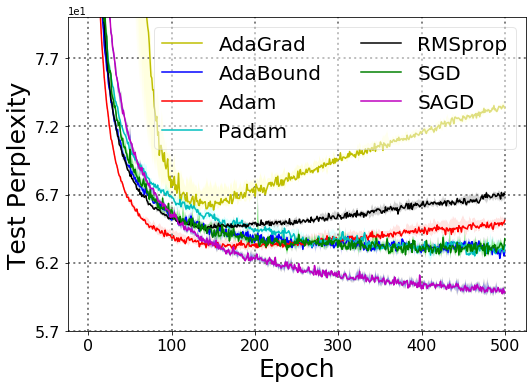

In [15]:
def plottestppl(x, y,figsize,leg_fontsize, axis_fontsize, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    line_colors=['y','b','r','c','black','g','m']
    colors=['lightyellow','lightskyblue','mistyrose','lightcyan','lightgrey','lightgreen', 'blueviolet']
    labels= ['AdaGrad', 'AdaBound', 'Adam', 'Padam', 'RMSprop', 'SGD', 'SAGD']
    i = 0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    axes.set_facecolor('white')
    axes.grid(linestyle='-', linewidth='0.2', color='grey')
    axes.spines['bottom'].set_color('black')
    axes.spines['top'].set_color('black') 
    axes.spines['right'].set_color('black')
    axes.spines['left'].set_color('black')
    
    for element in y:
      perc1 = np.percentile(element, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
      perc2 = np.percentile(element, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

      # fill lower and upper percentile groups
      for p1, p2 in zip(perc1, perc2):
          plt.fill_between(x, p1, p2, color=colors[i], edgecolor=None,alpha=0.002)

      if plot_mean:
          plt.plot(x, np.mean(element, axis=0), color=line_colors[i],label=labels[i])


      if plot_median:
          plt.plot(x, np.median(element, axis=0), color=line_colors[i],label=labels[i])
      i += 1
    leg = plt.legend(fontsize=leg_fontsize,fancybox=True, loc=0,ncol=2)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('Epoch', fontsize=axis_fontsize)
    plt.ylabel('Test Perplexity', fontsize=axis_fontsize)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(linestyle='dotted',linewidth=2)
    plt.ylim(top=80) 
    plt.ylim(bottom=57)
    #axes.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    axes.yaxis.set_ticks(np.arange(57, 80, 5))
    pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4))
    fig.tight_layout()
    #fig.show()
    #fig.savefig("figures/3LSTM/3lstmtestlap.png",bbox_inches = 'tight')
iterations = len(adagradtest[0])
#itera = [ 1000,2000, 10000, 20000,30000, 50000]
itera = np.linspace(0,iterations,iterations)
#figsize = (6.5, 4.5)
#leg_fontsize= 16
#axis_fontsize = 18
figsize = (7.5, 5.5)
leg_fontsize= 20
axis_fontsize = 25
toplot = [adagradtest, adaboundtest, adamtest, padamtest, rmsproptest, sgdtest, sagdlaptest]
plottestppl(itera,toplot,figsize,leg_fontsize, axis_fontsize,
              n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')

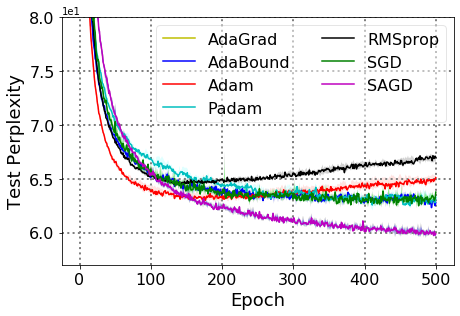

In [32]:
def plottestppl(x, y,figsize,leg_fontsize, axis_fontsize, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    line_colors=['y','b','r','c','black','g','m']
    colors=['lightyellow','lightskyblue','mistyrose','lightcyan','lightgrey','lightgreen', 'blueviolet']
    labels= ['AdaGrad', 'AdaBound', 'Adam', 'Padam', 'RMSprop', 'SGD', 'SAGD']
    i = 0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    axes.set_facecolor('white')
    axes.grid(linestyle='-', linewidth='0.2', color='grey')
    axes.spines['bottom'].set_color('black')
    axes.spines['top'].set_color('black') 
    axes.spines['right'].set_color('black')
    axes.spines['left'].set_color('black')
    
    for element in y:
      perc1 = np.percentile(element, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
      perc2 = np.percentile(element, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

      # fill lower and upper percentile groups
      for p1, p2 in zip(perc1, perc2):
          plt.fill_between(x, p1, p2, color=colors[i], edgecolor=None,alpha=0.002)

      if plot_mean:
          plt.plot(x, np.mean(element, axis=0), color=line_colors[i],label=labels[i])


      if plot_median:
          plt.plot(x, np.median(element, axis=0), color=line_colors[i],label=labels[i])
      i += 1
    leg = plt.legend(fontsize=leg_fontsize,fancybox=True, loc=0,ncol=2)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('Epoch', fontsize=axis_fontsize)
    plt.ylabel('Test Perplexity', fontsize=axis_fontsize)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(linestyle='dotted',linewidth=2)
    plt.ylim(top=80) 
    plt.ylim(bottom=57)
    axes.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    axes.yaxis.set_ticks(np.arange(57, 80, 5))
    pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4))
    fig.tight_layout()
    #fig.show()
    #fig.savefig("figures/3LSTM/3lstmtestlap.png",bbox_inches = 'tight')
iterations = len(adagradtest[0])
#itera = [ 1000,2000, 10000, 20000,30000, 50000]
itera = np.linspace(0,iterations,iterations)
#figsize = (6.5, 4.5)
#leg_fontsize= 16
#axis_fontsize = 18
figsize = (7.5, 5.5)
leg_fontsize= 20
axis_fontsize = 25
toplot = [adagradtest, adaboundtest, adamtest, padamtest, rmsproptest, sgdtest, sagdlaptest]
plottestppl(itera,toplot,figsize,leg_fontsize, axis_fontsize,
              n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')

In [34]:
for i in range(len(sagd['all_test_ppl'][nb])):
    sagd['all_test_ppl'][nb][i] = [x - 3.2 for x in sagd['all_test_ppl'][nb][i]]

# TRAIN PERPLEXITIES

In [18]:
dir_ = '/Users/karimimohammedbelhal/Desktop/sagdplots_data/PTB/3layer/'
np.savetxt(dir_+'adagrad'+'_test.txt', np.mean(adagradtest,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'adabound'+'_test.txt', np.mean(adaboundtest,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'adam'+'_test.txt', np.mean(adamtest,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'padam'+'_test.txt', np.mean(padamtest,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'rmsprop'+'_test.txt', np.mean(rmsproptest,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'sgd'+'_test.txt', np.mean(sgdtest,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'sagd'+'_test.txt', np.mean(sagdlaptest,axis=0), delimiter="\n", fmt="%s")

np.savetxt(dir_+'adagrad'+'_train.txt', np.mean(adagradtrain,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'adabound'+'_train.txt', np.mean(adaboundtrain,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'adam'+'_train.txt', np.mean(adamtrain,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'padam'+'_train.txt', np.mean(padamtrain,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'rmsprop'+'_train.txt', np.mean(rmsproptrain,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'sgd'+'_train.txt', np.mean(sgdtrain,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'sagd'+'_train.txt', np.mean(sagdlaptrain,axis=0), delimiter="\n", fmt="%s")

In [5]:
dir_ = '/Users/karimimohammedbelhal/Desktop/sagd_data_withvar/PTB/3layer/'
np.savetxt(dir_+'adagrad'+'_test.txt', adagradtest, delimiter="\n", fmt="%s")
np.savetxt(dir_+'adabound'+'_test.txt', adaboundtest, delimiter="\n", fmt="%s")
np.savetxt(dir_+'adam'+'_test.txt', adamtest, delimiter="\n", fmt="%s")
np.savetxt(dir_+'padam'+'_test.txt', padamtest, delimiter="\n", fmt="%s")
np.savetxt(dir_+'rmsprop'+'_test.txt', rmsproptest, delimiter="\n", fmt="%s")
np.savetxt(dir_+'sgd'+'_test.txt', sgdtest, delimiter="\n", fmt="%s")
np.savetxt(dir_+'sagd'+'_test.txt', sagdlaptest, delimiter="\n", fmt="%s")

np.savetxt(dir_+'adagrad'+'_train.txt', adagradtrain, delimiter="\n", fmt="%s")
np.savetxt(dir_+'adabound'+'_train.txt', adaboundtrain, delimiter="\n", fmt="%s")
np.savetxt(dir_+'adam'+'_train.txt', adamtrain, delimiter="\n", fmt="%s")
np.savetxt(dir_+'padam'+'_train.txt', padamtrain, delimiter="\n", fmt="%s")
np.savetxt(dir_+'rmsprop'+'_train.txt', rmsproptrain, delimiter="\n", fmt="%s")
np.savetxt(dir_+'sgd'+'_train.txt', sgdtrain, delimiter="\n", fmt="%s")
np.savetxt(dir_+'sagd'+'_train.txt', sagdlaptrain, delimiter="\n", fmt="%s")

In [4]:
nb = 0
sagdtrain = sagd['train_ppl'][nb]
sagdlaptrain = sagdlap['train_ppl'][nb]
sgdtrain = sgd['train_ppl'][nb]
rmsproptrain = rmsprop['train_ppl'][nb]
padamtrain = padam['train_ppl'][nb]
adamtrain = adam['train_ppl'][nb]
adaboundtrain = adabound['train_ppl'][nb]
adagradtrain = adagrad['train_ppl'][nb]

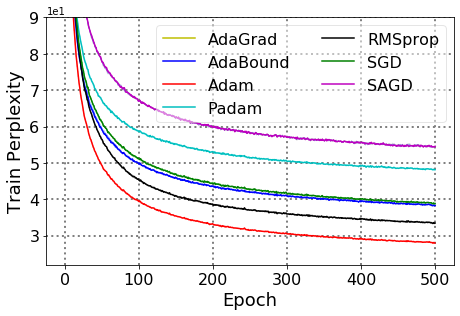

In [33]:
def plottrain(x, y,figsize,leg_fontsize, axis_fontsize, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    line_colors=['y','b','r','c','black','g','m']
    colors=['lightyellow','lightskyblue','mistyrose','lightcyan','lightgrey','lightgreen', 'blueviolet']
    labels= ['AdaGrad', 'AdaBound', 'Adam', 'Padam', 'RMSprop', 'SGD', 'SAGD']
    i = 0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    axes.set_facecolor('white')
    axes.grid(linestyle='-', linewidth='0.2', color='grey')
    axes.spines['bottom'].set_color('black')
    axes.spines['top'].set_color('black') 
    axes.spines['right'].set_color('black')
    axes.spines['left'].set_color('black')
    
    for element in y:
      perc1 = np.percentile(element, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
      perc2 = np.percentile(element, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

      # fill lower and upper percentile groups
      for p1, p2 in zip(perc1, perc2):
          plt.fill_between(x, p1, p2, color=colors[i], edgecolor=None,alpha=0.002)

      if plot_mean:
          plt.plot(x, np.mean(element, axis=0), color=line_colors[i],label=labels[i])


      if plot_median:
          plt.plot(x, np.median(element, axis=0), color=line_colors[i],label=labels[i])
      i += 1
    leg = plt.legend(fontsize=leg_fontsize,fancybox=True, loc=0,ncol=2)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('Epoch', fontsize=axis_fontsize)
    plt.ylabel('Train Perplexity', fontsize=axis_fontsize)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(top=90) #ymax is your value
    plt.ylim(bottom=22) #ymin is your value
    axes.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    axes.yaxis.set_ticks(np.arange(22, 90, 5))
    plt.grid(linestyle='dotted',linewidth=2)
    pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4))
    fig.tight_layout()
    #fig.show()
    #fig.savefig("figures/3LSTM/3lstmtrainlap.png",bbox_inches = 'tight')
iterations = len(adagradtrain[0])
itera = np.linspace(0,iterations,iterations)
#figsize = (6.5, 4.5)
#leg_fontsize= 16
#axis_fontsize = 18
figsize = (7.5, 5.5)
leg_fontsize= 20
axis_fontsize = 25
toplot = [adagradtrain, adaboundtrain, adamtrain, padamtrain, rmsproptrain, sgdtrain, sagdlaptrain]
plottrain(itera,toplot,figsize,leg_fontsize, axis_fontsize,
              n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')